In [400]:
########## CÉLULA 1 #######################################################################################
# library import
import pandas as pd
import seaborn as sn
import pandas
import numpy
import scipy
import random
import statsmodels as sm
import csv
from matplotlib import pyplot
from random import randint
import statsmodels.formula.api as smf
import statistics
from statsmodels.stats.diagnostic import het_white

In [337]:
########## CÉLULA 2 #######################################################################################
# Importação e leitura dos dados
renda_per_capita = pd.read_csv("renda_per_capita.csv", sep=";")
fecundidade = pd.read_csv("taxa_fecun.csv", sep=";")
idh = pd.read_csv("idh.csv", sep=";")

In [338]:
########## CÉLULA 3 #######################################################################################
## Reanomeando as colunas para melhor trabalhar
fecundidade.rename(columns={'Taxa de fecundidade':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'Fec_1991','Unnamed: 4':'Fec_2000'}, inplace = True)
fecundidade.drop([0])
fecundidade.head()

,Estado,Codigo,Municipio,Fec_1991,Fec_2000
0,Sigla,Código,Município,1991,2000
1,AC,1200013,Acrelândia,"4,887","4,355"
2,AC,1200054,Assis Brasil,"6,02","3,133"
3,AC,1200104,Brasiléia,"3,588","3,057"
4,AC,1200138,Bujari,"5,427","3,483"


In [359]:
########## CÉLULA 4 #######################################################################################
## Parte referente ao Sorteio da amostra.
estados = ["Acre", "Alagoas",  "Amapá", "Amazonas", "Bahia", "Ceará", "Espírito Santo", "Goiás", "Maranhão", "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais", "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina", "São Paulo", "Sergipe", "Tocantins", "Distrito Federal"]
num_sorteio=randint(0,26 )    ## Gera aleatoriamente um número entre 0 e 26 para identificar o estado
random.shuffle(estados)       ## Embaralha a lista de estados
estado_sel=estados[num_sorteio] ##Seleciona o estado escolhido
print("O número do sorteio foi",num_sorteio,"e o estado equivalente a essa linha foi",estado_sel)

O número do sorteio foi 4 e o estado equivalente a essa linha foi São Paulo


In [360]:
########## CÉLULA 5 #######################################################################################
amostra_estados_fecun=fecundidade.loc[fecundidade['Estado']=="SP"] ##Seleciona a amostra do conjuto de estado

In [361]:
########## CÉLULA 6 #######################################################################################
## Renomeando os dados referente a renda
renda_per_capita.rename(columns={'Renda per capita':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'rend_1991','Unnamed: 4':'rend_2000'}, inplace = True)
renda_per_capita.drop([0])
amostra_estados_renda=renda_per_capita.loc[renda_per_capita['Estado']=="SP"] ##Seleciona a amostra do conjuto de estados
print(amostra_estados_renda)

     Estado   Codigo         Municipio rend_1991 rend_2000
4812     SP  3500105        Adamantina   274,462   354,976
4813     SP  3500204            Adolfo   188,474   238,019
4814     SP  3500303             Aguaí    207,71   308,123
4815     SP  3500402    Águas da Prata   264,161   337,636
4816     SP  3500501  Águas de Lindóia   246,354   402,516
...     ...      ...               ...       ...       ...
5453     SP  3557105       Votuporanga   265,155   415,653
5454     SP  3557154          Zacarias   153,055   195,161
5455     SP  3557204         Chavantes   181,337   272,364
5456     SP  3557303      Estiva Gerbi   222,336   249,702
5457     SP  3599919       Santo Amaro       NaN       NaN

[646 rows x 5 columns]


In [362]:
########## CÉLULA 7 #######################################################################################
#################### IDH ###################
idh.rename(columns={'Índice de Desenvolvimento Humano Municipal-ed 2003':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'idh_1991','Unnamed: 4':'idh_2000'}, inplace = True)
idh.drop([0])
amostra_estados_idh=idh.loc[idh['Estado']=="SP"] ##Seleciona a amostra do conjuto de estados
mun_idh=amostra_estados_idh.sort_values('Municipio', ascending = True) ##Colocando em ordem alfabética
var_idh=mun_idh.idh_2000
#print(mun_idh)

In [363]:
########## CÉLULA 8 #######################################################################################
mun_renda=amostra_estados_renda.sort_values('Municipio', ascending = True) ##Colocando em ordem alfabética
mun_fecun=amostra_estados_fecun.sort_values('Municipio', ascending = True)

In [364]:
########## CÉLULA 9 #######################################################################################
print(mun_renda)
print(mun_fecun)
print(mun_idh)

     Estado   Codigo           Municipio rend_1991 rend_2000
4812     SP  3500105          Adamantina   274,462   354,976
4813     SP  3500204              Adolfo   188,474   238,019
4814     SP  3500303               Aguaí    207,71   308,123
4819     SP  3500709              Agudos   209,126   266,321
4820     SP  3500758            Alambari   173,714   210,688
...     ...      ...                 ...       ...       ...
4818     SP  3500600  Águas de São Pedro   578,264   954,649
4826     SP  3501202    Álvares Florence   134,518   250,617
4827     SP  3501301     Álvares Machado   184,534   257,505
4828     SP  3501400  Álvaro de Carvalho   109,863   176,873
5193     SP  3533809                Óleo   162,936   209,001

[646 rows x 5 columns]
     Estado   Codigo           Municipio Fec_1991 Fec_2000
4812     SP  3500105          Adamantina    2,434     1,98
4813     SP  3500204              Adolfo    2,948    2,024
4814     SP  3500303               Aguaí    2,685    2,593
4819    

In [365]:
########## CÉLULA 10 #######################################################################################
var_tx_fecundidade=mun_fecun.Fec_2000
var_renda_per_capita=mun_renda.rend_2000
#pd.to_numeric(var_tx_fecundidade, errors='ignore')
#pd.to_numeric(var_renda_per_capita, errors='ignore')

In [366]:
########## CÉLULA 11 #######################################################################################
var_tx_fecundidade.reset_index(inplace=True, drop=True)
var_renda_per_capita.reset_index(inplace=True, drop=True)
print(var_tx_fecundidade)
#print(var_idh)

0       1,98
1      2,024
2      2,593
3       2,23
4      3,048
       ...  
641     1,91
642     1,94
643    2,208
644     2,74
645    2,445
Name: Fec_2000, Length: 646, dtype: object


In [367]:
########## CÉLULA 12 #######################################################################################
var_tx_fecundidade.describe()

count      645
unique     442
top       1,94
freq         8
Name: Fec_2000, dtype: object

In [368]:
########## CÉLULA 13 #######################################################################################
df = pd.DataFrame(list(zip(var_tx_fecundidade,var_idh)), columns = ['Tx_Fecun','idh_2000']) ## Agrupa as variáveis
display(df)

,Tx_Fecun,idh_2000
0,"1,98","0,812"
1,"2,024","0,795"
2,"2,593","0,786"
3,"2,23","0,786"
4,"3,048","0,748"
...,...,...
641,"1,91","0,908"
642,"1,94","0,771"
643,"2,208","0,772"
644,"2,74","0,73"


In [369]:
########## CÉLULA 14 #######################################################################################
df['Tx_Fecun'] = df['Tx_Fecun'].str.replace(',', '.') ##Substituindo vírgula por ponto
df['idh_2000'] = df['idh_2000'].str.replace(',', '.') ##Substituindo vírgula por ponto
print(type(df))
df['Tx_Fecun'] = df['Tx_Fecun'].astype(float)         ##Convertendo em float
df['idh_2000'] = df['idh_2000'].astype(float)         ##Convertendo em float
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tx_Fecun  645 non-null    float64
 1   idh_2000  645 non-null    float64
dtypes: float64(2)
memory usage: 10.2 KB


,Tx_Fecun,idh_2000
0,1.980,0.812
1,2.024,0.795
2,2.593,0.786
3,2.230,0.786
4,3.048,0.748
...,...,...
641,1.910,0.908
642,1.940,0.771
643,2.208,0.772
644,2.740,0.730


In [370]:
########## CÉLULA 15 #######################################################################################
df['Tx_Fecun_log']= numpy.log2(df['Tx_Fecun']) # Aplica log de base2


In [371]:
########## CÉLULA 16 #######################################################################################
df.head()

,Tx_Fecun,idh_2000,Tx_Fecun_log
0,1.980,0.812,0.985500
1,2.024,0.795,1.017209
2,2.593,0.786,1.374622
3,2.230,0.786,1.157044
4,3.048,0.748,1.607863


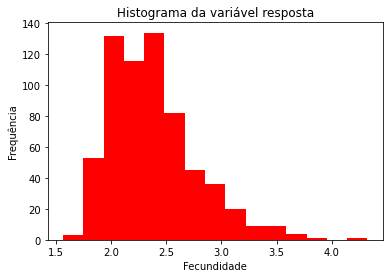

,Tx_Fecun,idh_2000,Tx_Fecun_log
count,645.000000,645.000000,645.000000
mean,2.374112,0.779149,1.228666
std,0.397481,0.033818,0.228914
min,1.564000,0.645000,0.645241
25%,2.064000,0.758000,1.045443
50%,2.312000,0.779000,1.209141
75%,2.578000,0.802000,1.366252
max,4.323000,0.919000,2.112033


In [372]:
########## CÉLULA 17 #######################################################################################
pyplot.hist(df['Tx_Fecun'], color='red', bins=15)
pyplot.title('Histograma da variável resposta')
pyplot.xlabel("Fecundidade")
pyplot.ylabel("Frequência")
pyplot.show()
df.describe()

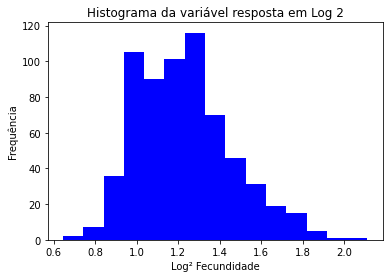

count    645.000000
mean       1.228666
std        0.228914
min        0.645241
25%        1.045443
50%        1.209141
75%        1.366252
max        2.112033
Name: Tx_Fecun, dtype: float64

In [373]:
########## CÉLULA 18 #######################################################################################
pyplot.hist(df['Tx_Fecun_log'], color='blue', bins=15)
pyplot.title('Histograma da variável resposta em Log 2')
pyplot.xlabel("Log² Fecundidade")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
dflog.describe()


In [374]:
########## CÉLULA 19 #######################################################################################
modelo = smf.ols('Tx_Fecun_log ~ idh_2000', df)
#modelo = smf.ols('Renda_per_capita ~ Tx_Fecun', df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tx_Fecun_log   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     279.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.58e-52
Time:                        22:35:23   Log-Likelihood:                 152.56
No. Observations:                 645   AIC:                            -301.1
Df Residuals:                     643   BIC:                            -292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1304      0.174     23.760      0.000       3.789       4.472
idh_2000      -3.7242      0.223    -16.708      0.000      -4.162      -3.287
==============================================================================
Omnibus:                        5.004   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.817
Skew:                           0.172   Prob(JB):                       0.0899
Kurtosis:                       2.752   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [375]:
########## CÉLULA 20 #######################################################################################
resultado.params ### Parâmetro do Modelo

Intercept    4.130403
idh_2000    -3.724239
dtype: float64

In [376]:
########## CÉLULA 21 #######################################################################################
## FEC_IDH = 4,130 -3,724*IDH *
y=4.130-3.724*df['idh_2000']
print(y)

0      1.106112
1      1.169420
2      1.202936
3      1.202936
4      1.344448
         ...   
641    0.748608
642    1.258796
643    1.255072
644    1.411480
645    1.296036
Name: idh_2000, Length: 646, dtype: float64


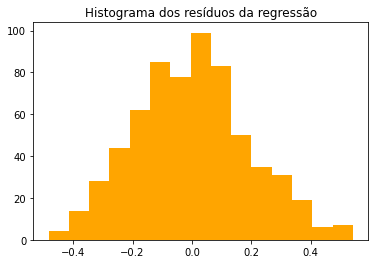

count    645.000000
mean       0.000217
std        0.191151
min       -0.482628
25%       -0.131687
50%        0.002507
75%        0.115313
max        0.541517
dtype: float64

In [377]:
########## CÉLULA 22 #######################################################################################
residuos=df['Tx_Fecun_log'] - y
pyplot.hist(residuos, color='orange', bins=15)
pyplot.title('Histograma dos resíduos da regressão')
pyplot.show()
residuos.describe()

In [397]:
########## CÉLULA 23 #######################################################################################
jarque_b = scipy.stats.jarque_bera(df['idh_2000'])
print(jarque_b)

Jarque_beraResult(statistic=nan, pvalue=nan)


In [379]:
########## CÉLULA 24 #######################################################################################
residuos.corr(df['idh_2000'])
#0.000042288


-4.2288375604781475e-05

In [380]:
########## CÉLULA 25 #######################################################################################
var_res= statistics.variance(residuos)
print(var_res)

nan


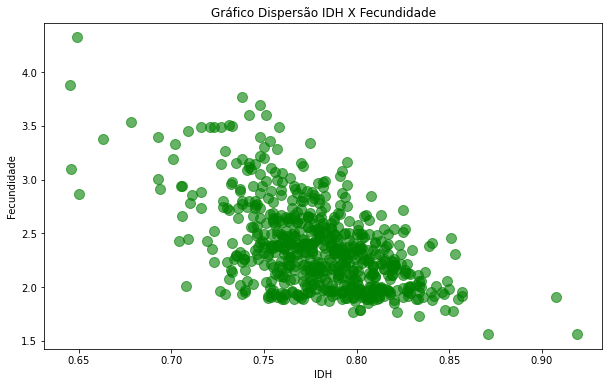

In [381]:
########## CÉLULA 26 #######################################################################################
#pyplot.figure(figsize=(20,5))
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
pyplot.figure(figsize=(10, 6))
pyplot.title("Gráfico Dispersão IDH X Fecundidade")
pyplot.xlabel("IDH")
pyplot.ylabel("Fecundidade")
pyplot.scatter(df['idh_2000'], df['Tx_Fecun'], s=100, c='green', alpha=0.6)
#print(df['Tx_Fecun'])
#print(var_idh)

In [382]:
########## CÉLULA 26 #######################################################################################
df['idh_2000'].corr(df['Tx_Fecun'])

-0.554037020969888

In [383]:
########## CÉLULA 27 #######################################################################################
test=fecundidade['Municipio']


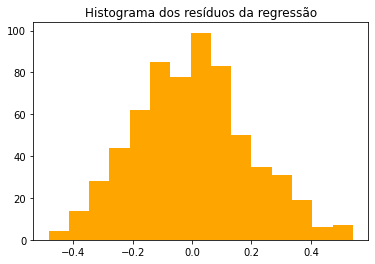

0     -0.120820
1     -0.152423
2      0.171471
3     -0.046107
4      0.263191
         ...   
641    0.184779
642   -0.302958
643   -0.112550
644    0.042468
645   -0.006422
Length: 645, dtype: float64
0     -0.120612
1     -0.152211
2      0.171686
3     -0.045892
4      0.263415
         ...   
641    0.184965
642   -0.302739
643   -0.112332
644    0.042696
645   -0.006202
Length: 646, dtype: float64


In [384]:
########## CÉLULA 28 #######################################################################################
uhat=resultado.resid
pyplot.hist(uhat, color='orange', bins=15)
pyplot.title('Histograma dos resíduos da regressão')
pyplot.show()
print(uhat)
print(residuos)


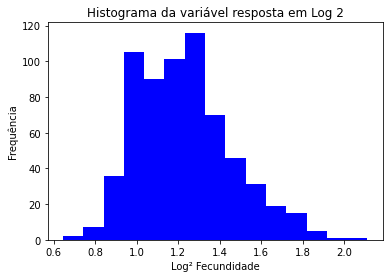

count    645.000000
mean       1.228666
std        0.228914
min        0.645241
25%        1.045443
50%        1.209141
75%        1.366252
max        2.112033
Name: Tx_Fecun, dtype: float64

In [385]:
########## CÉLULA 29 #######################################################################################
pyplot.hist(dflog, color='blue', bins=15)
pyplot.title('Histograma da variável resposta em Log 2')
pyplot.xlabel("Log² Fecundidade")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
dflog.describe()


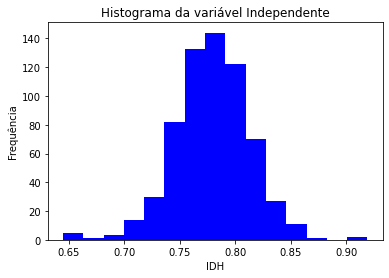

count    645.000000
mean       0.779149
std        0.033818
min        0.645000
25%        0.758000
50%        0.779000
75%        0.802000
max        0.919000
Name: idh_2000, dtype: float64

In [389]:
########## CÉLULA 30 #######################################################################################
pyplot.hist(df['idh_2000'], color='blue', bins=15)
pyplot.title('Histograma da variável Independente')
pyplot.xlabel("IDH")
pyplot.ylabel("Frequência")
dflog.describe()
pyplot.show()
df['idh_2000'].describe()


In [406]:
########## CÉLULA 31 #######################################################################################
white_test = het_white(resultado.resid,  resultado.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))


{'Test Statistic': 40.99951766671461, 'Test Statistic p-value': 1.2504543979145963e-09, 'F-Statistic': 21.789461359657142, 'F-Test p-value': 6.987152564760855e-10}
